In [1]:
import pandas as pd
import matplotlib.pyplot as plt
filename = "/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv"
df = pd.read_csv(filename)
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


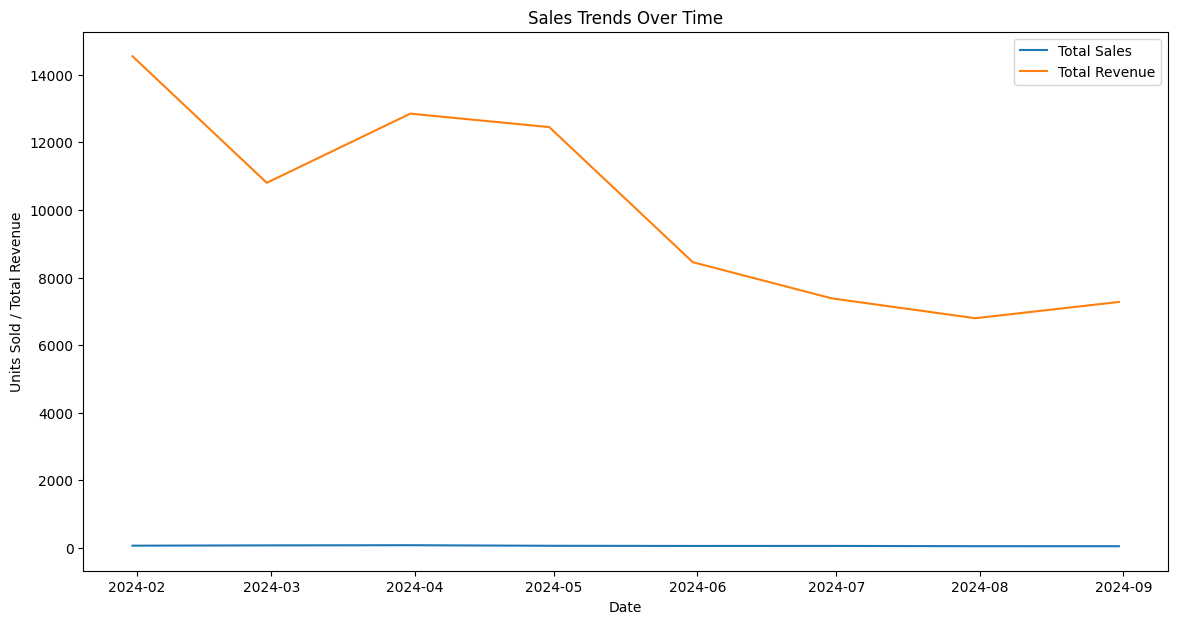

In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df_monthly = df.resample('ME', on='Date').sum()

plt.figure(figsize=(14, 7))
plt.plot(df_monthly.index, df_monthly['Units Sold'], label='Total Sales')
plt.plot(df_monthly.index, df_monthly['Total Revenue'], label='Total Revenue')
plt.xlabel('Date')
plt.ylabel('Units Sold / Total Revenue')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()


In [3]:
df_grouped = df.groupby(['Date', 'Product Category']).sum().reset_index()

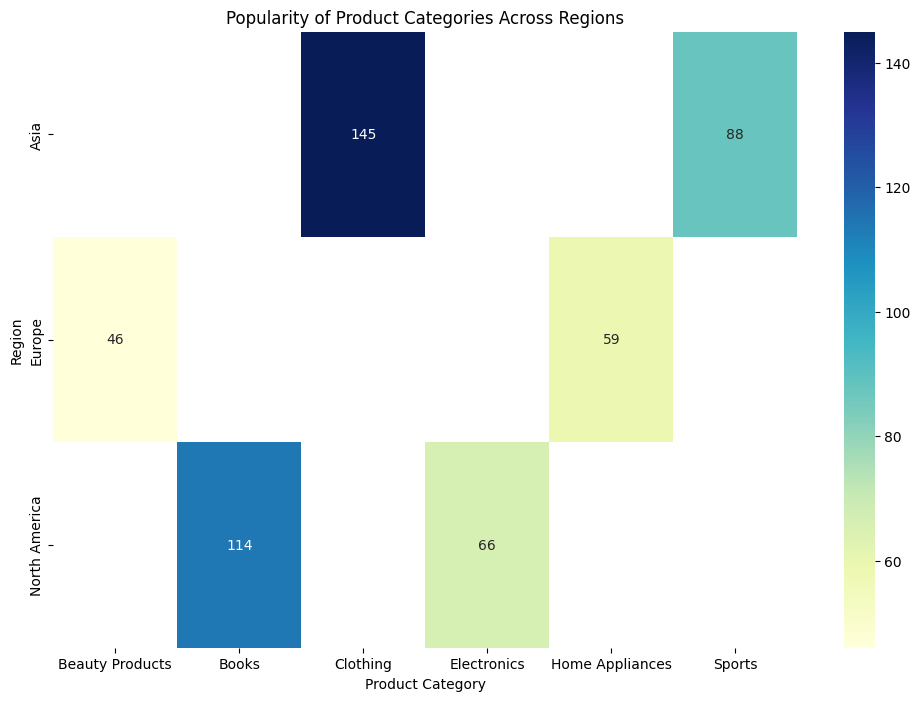

In [4]:
import seaborn as sns

category_region_sales = df.groupby(['Region', 'Product Category'])['Units Sold'].sum().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(category_region_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.title('Popularity of Product Categories Across Regions')
plt.show()


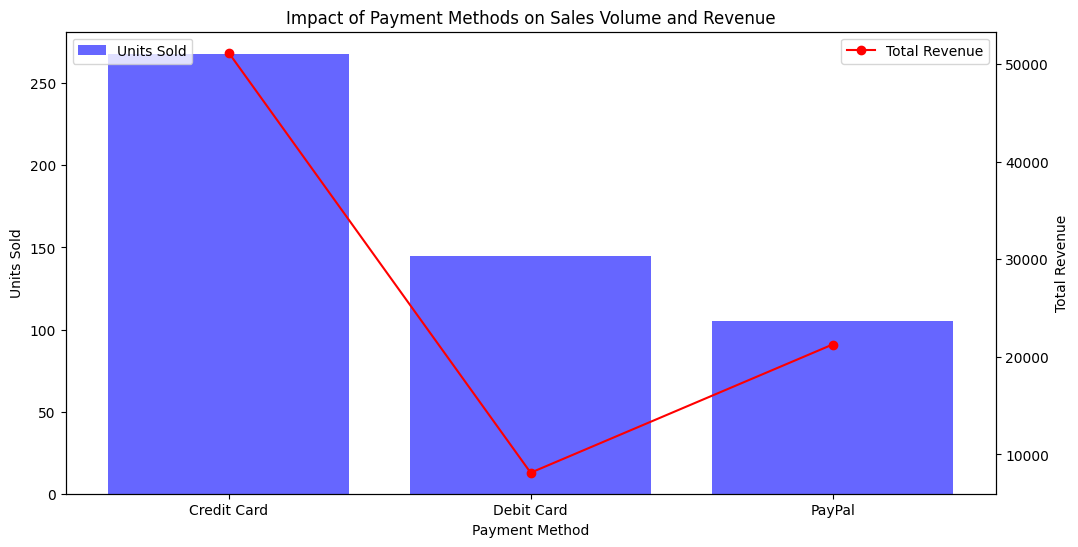

In [5]:
payment_method_sales = df.groupby('Payment Method').agg({'Units Sold': 'sum', 'Total Revenue': 'sum'}).reset_index()
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(payment_method_sales['Payment Method'], payment_method_sales['Units Sold'], color='b', alpha=0.6, label='Units Sold')
ax1.set_ylabel('Units Sold')
ax1.set_xlabel('Payment Method')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(payment_method_sales['Payment Method'], payment_method_sales['Total Revenue'], color='r', marker='o', label='Total Revenue')
ax2.set_ylabel('Total Revenue')
ax2.legend(loc='upper right')

plt.title('Impact of Payment Methods on Sales Volume and Revenue')
plt.show()


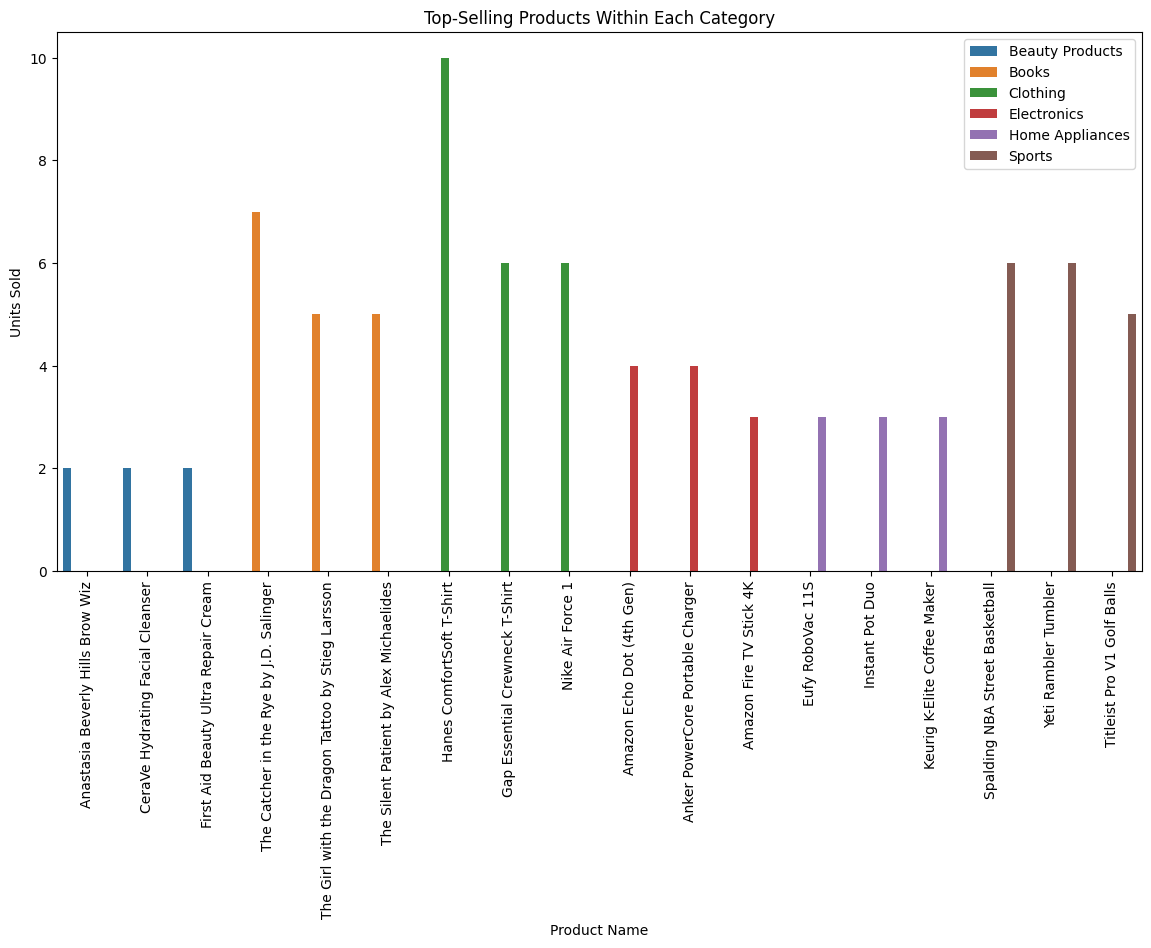

In [6]:
product_sales = df.groupby(['Product Category', 'Product Name'])['Units Sold'].sum().reset_index()
top_products = product_sales.sort_values(['Product Category', 'Units Sold'], ascending=[True, False]).groupby('Product Category').head(3)

plt.figure(figsize=(14, 7))
sns.barplot(x='Product Name', y='Units Sold', hue='Product Category', data=top_products)
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Units Sold')
plt.title('Top-Selling Products Within Each Category')
plt.legend(loc='upper right')
plt.show()


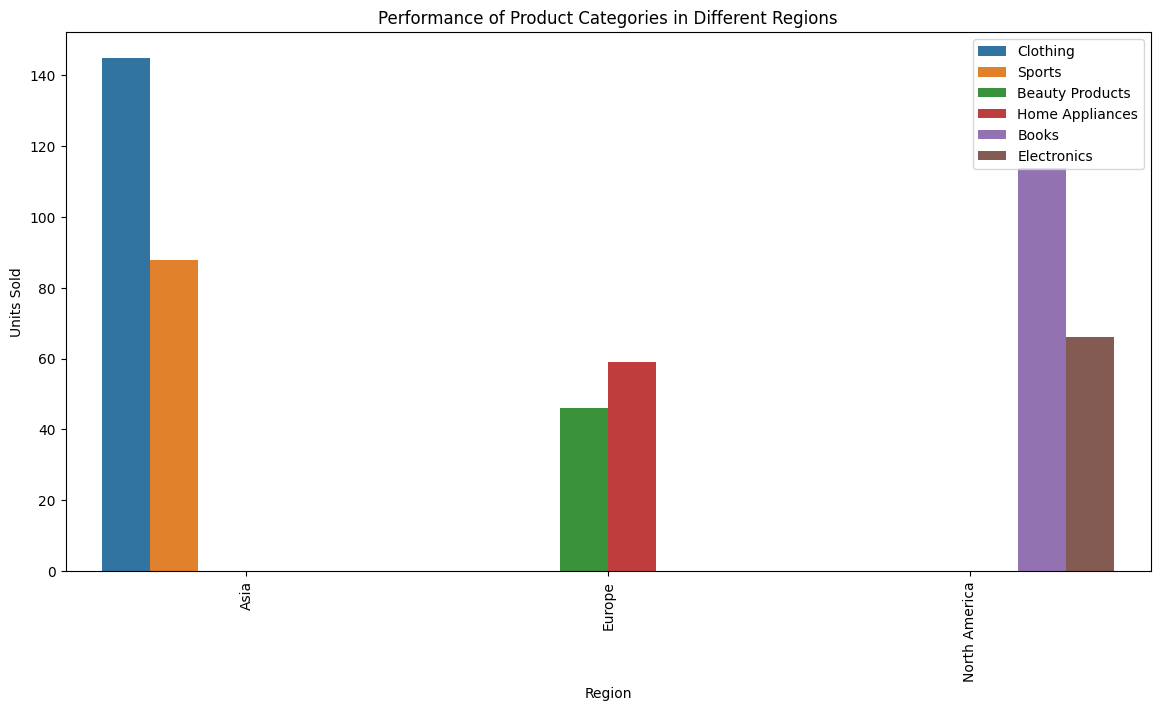

In [7]:
category_region_performance = df.groupby(['Region', 'Product Category']).agg({'Units Sold': 'sum', 'Total Revenue': 'sum'}).reset_index()
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x='Region', y='Units Sold', hue='Product Category', data=category_region_performance, ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.title('Performance of Product Categories in Different Regions')
plt.legend(loc='upper right')
plt.show()
